# Complex numbers in python
### Developed for eltech processing

## Part 1. Introduction


In [1]:
import cmath  # For advanced features e.g. pfase, polar.
# cmath means Complex MATH

import math  # To work with square roots, pi...

In [2]:
# Basics functionality
z1 = complex(3,4)
z2 = complex(-2,5)

print('z1=', z1, '\nz2=', z2)
print('z1*z2=', z1*z2)
print('z1^2=',z1**2)

z1= (3+4j) 
z2= (-2+5j)
z1*z2= (-26+7j)
z1^2= (-7+24j)


In [3]:
# Advanced functionality (using cmath package)

z3 = complex(1,1)  # z3 = 1+i: r = sqrt(2), phase = +pi/4 - expected
w = cmath.polar(z3)  # Convert complex number to polar form
  
print ("The modulus and argument of polar complex number is :")
print(w)

print('\nsqrt(2)=', math.sqrt(2))
print('pi/4=', math.pi/4)

print('\nIt works! Wow!')

The modulus and argument of polar complex number is :
(1.4142135623730951, 0.7853981633974483)

sqrt(2)= 1.4142135623730951
pi/4= 0.7853981633974483

It works! Wow!


In [4]:
# The r and phase could be extracted by:
radius_peremennaya = w[0]  # You can name em by your way
phasa_peremennaya = w[1]  # Don't be afraid :) 

print('r is', radius_peremennaya)
print('phase is', phasa_peremennaya)

r is 1.4142135623730951
phase is 0.7853981633974483


In [5]:
# To transform polar form to the rectangular use rect(r, phi) function:
print('w =',w, '- in polar form')
z = cmath.rect(w[0],w[1])
print("The rectangular form of w is : ")
print(z)

print('Uncertainty is connected with python\'s accuracy. It\'s ok.')

w = (1.4142135623730951, 0.7853981633974483) - in polar form
The rectangular form of w is : 
(1.0000000000000002+1j)
Uncertainty is connected with python's accuracy. It's ok.


In [6]:
# Some additional examples
z1 = cmath.rect(math.sqrt(2), math.pi/2)  # Initial z1 with r and phi
w1 = cmath.polar(z1)  # Convert z1 to a polar form
print(w1)

z2 = cmath.rect(math.sqrt(8), 3*math.pi/2) # Initial z2 with r and phi
w2 = cmath.polar(z2)  # Convert z2 to a polar form
print(w2)  # !Note that +3pi/2 is the same as a -pi/2

z3 = z1*z2
print('\n Re(z3)=', z3.real )
print('Im(z3)=',    z3.imag )

# Or in the polar form:
r3 = cmath.polar(z1*z2)[0]
phase3 = cmath.polar(z1*z2)[1]
print('w3 = (',r3, ',', phase3,')')

# To exclude a "trash of accuracy" out from the results one can use a round() function:
print('\nRe(z3)=', round(z3.real,5)  )
print('Im(z3)=',   round(z3.imag,5)  )

# The same for polar one:
print('w3 = (', round(r3, 5) , ',', round(phase3, 5),')')

(1.4142135623730951, 1.5707963267948966)
(2.8284271247461903, -1.5707963267948968)

 Re(z3)= 4.000000000000001
Im(z3)= -9.797174393178828e-16
w3 = ( 4.000000000000001 , -2.4492935982947064e-16 )

Re(z3)= 4.0
Im(z3)= -0.0
w3 = ( 4.0 , -0.0 )


### Using this package u can produce the eltech BDZ without any problems!
#### Good luck!


## Part 2. Draw with the matplotlib package
### It's powerfull but more difficult

In [91]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np

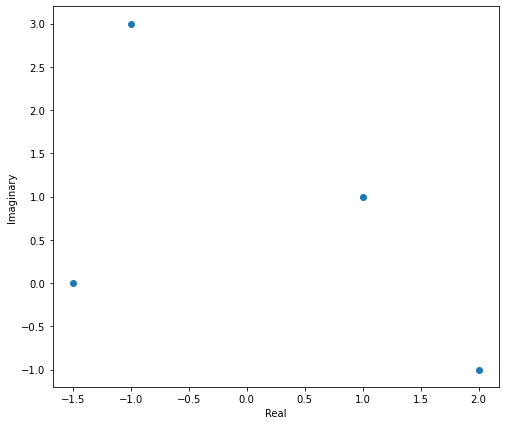

In [8]:
# create data of complex numbers
z1 = complex(1.0, 1)
z2 = complex(2.0, -1)
z3 = complex(-1.0, 3)
z4 = complex(-1.5, 0)

data = [z1,z2,z3,z4]
# Convert to numpy format
data = np.array(data)


# extract real part using numpy array
x = data.real
# extract imaginary part using numpy array
y = data.imag


# plot the complex numbers
plt.figure(figsize=(8, 7))
plt.scatter(x, y)
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

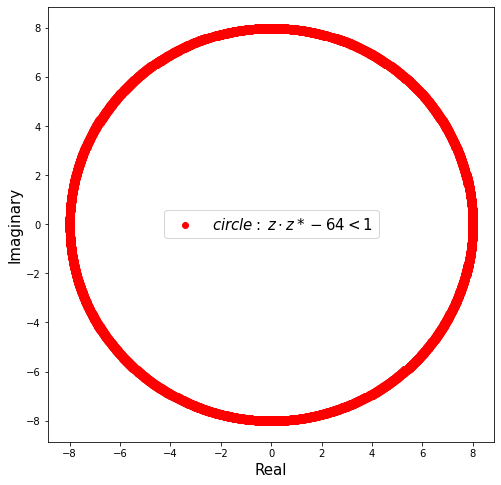

In [9]:
plt.figure(figsize=(8, 8))

# Advanced example
data = []
for x in np.linspace(-10,10,1000):
    for y in np.linspace(-10,10,1000):
        z = complex(x,y)
        if abs((z.conjugate()*z).real - 64) < 1:  # if z^2 - 64 < 1
            data.append(z) 

data = np.array(data)
# extract real part using numpy array
x = data.real
# extract imaginary part using numpy array
y = data.imag

plt.scatter(x, y, label=r'$circle:\; z\cdot z* - 64 < 1$',c='r')
plt.ylabel('Imaginary',fontsize=15)
plt.xlabel('Real',fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Part 3 Draw with the custom function
### Powerfull and easy to use!

in progress:
* Arrows:
    * Do an arrow plot - DONE
    * Arrows with the names
* Customize axis

In [300]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np

# Define the |z| as a sqrt(zz*):
cabs = lambda z: math.sqrt((z*z.conjugate()).real)  # cabs = Complex ABS


def _colorize(arr):  # e.g. [1,3,2,5,4] -> 5 colors
        norm = mpl.colors.Normalize(vmin=np.min(arr), vmax=np.max(arr))
        cmap = cm.Accent
        m = cm.ScalarMappable(norm=norm, cmap=cmap)
        return m.to_rgba(arr)


def drawz(z_array,  # Array with complex numbers you want to draw 
          names=[],  # Array with names of the variables 
          leg_on=True,  # Turns off the legend
          scale=1,  # Scales the canvas if it's too small
          no_arrows=False  # Turns off the arrows 
         ):

    # Check the input data
    assert type(z_array) == list
    
    for z in z_array:
        assert type(z) == complex
        
#     if len(names) > 0:
#         assert len(names) == len(z_array)

    # Adjust the canvas
    zrls = [z.real for z in z_array]; zrls.append(0)
    zims = [z.imag for z in z_array]; zims.append(0)
    
    xmin = min(zrls);  xmax = max(zrls) 
    ymin = min(zims);  ymax = max(zims) 
    
    Lx = xmax - xmin
    Ly = ymax - ymin

    fig = plt.figure(figsize=(Lx*scale, Ly*scale))
    plt.xlim(xmin*1.02-0.05, xmax*1.02+0.05)
    plt.ylim(ymin*1.02-0.05, ymax*1.02+0.05)
    
    # Plot
    clrs = _colorize( [i for i in range(len(z_array))] )
    lw = canv_size/3
    
    for i,z in enumerate(z_array):
        clr = clrs[i]
        _strp = 0.02*cabs(z)
        
        # Select a name from the list
        name = ''
        if len(names) > i:
            name = names[i]
        
        # Draw a line
        plt.plot([0, z.real*0.99], [0, z.imag*0.99], lw=lw, c=clr, 
                 label = name+' = '+str(z))
        
        # Draw an arrow
        if not no_arrows:
            zn = complex(z.imag/cabs(z),  # normal vector to z
                         -z.real/cabs(z))
            w_p = z*0.95+zn*_strp  # Right-side point (rsp)
            w_m = z*0.95-zn*_strp  # Left-side point (lsp)
            
            # Plot the line across rsp, z, lsp - it's an arrow!
            plt.plot([w_p.real, z.real, w_m.real], 
                     [w_p.imag, z.imag, w_m.imag], lw=lw, c=clr)
    
    # Setting up the axis
    plt.ylabel('Imaginary',fontsize=15)
    plt.xlabel('Real',fontsize=15)
    
    # Draw a legend & grid
    if leg_on: plt.legend(fontsize=10)
    plt.grid()

    return fig

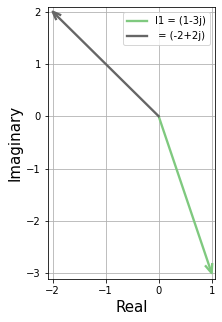

In [301]:
z1 = 1-3j
z2 = -2+2j
# z_array = [z1+i for i in np.linspace(1,2,4)]
z_array = [z1,z2]
names = ['I1']
fig = drawz(z_array, names=names, leg_on=True, scale=1, no_arrows=False)
fig.savefig('Complex_draw.pdf')

# Part 4. Practice

In [ ]:
# coming soon

# Backup

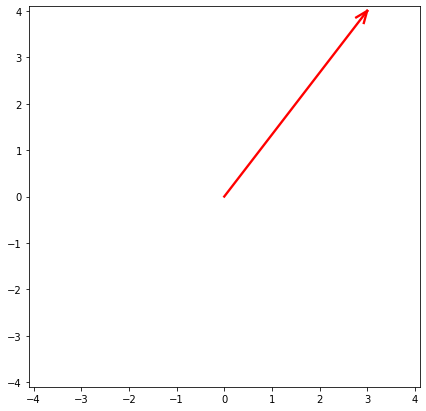

In [218]:
# Backup


canv_size = 7
lw = canv_size/3
_strp = 0.1
clr = 'r'
plt.figure(figsize=(canv_size, canv_size))

z = complex(3,4)

lmm = max(abs(z.imag),abs(z.real))
plt.ylim(-lmm-0.1, lmm+0.1)
plt.xlim(-lmm-0.1, lmm+0.1)

zn = complex(z.imag/cabs(z), -z.real/cabs(z))  # normal vector to z
w_p = z*0.95+zn*_strp
w_m = z*0.95-zn*_strp

plt.plot([0, z.real], [0, z.imag], lw=lw, c=clr)
plt.plot([w_p.real, z.real], [w_p.imag, z.imag], lw=lw, c=clr)
plt.plot([w_m.real, z.real], [w_m.imag, z.imag], lw=lw, c=clr)

plt.savefig('Complex_draw.pdf')

  
# nLx, nx = round(Lx), 0
# nLy, ny = round(Ly), 0
# 
# while(nLx == 0):
#     Lx *= 10
#     nLx = round(Lx)
#     nx+=1
# 
# while(nLy == 0):
#     Ly *= 10
#     nLy = round(Ly)
#     ny+=1 